## Análisis de datos - Clase 4

### Tests de estadística inferencial

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [161]:
# Cargamos el dataset del Titanic
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [162]:
# Estadística descriptiva de las numéricas
titanic_df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
# Repasamos las características
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Nos quedamos con: 
- Categóricas: `survived` (0/1), `sex`, `pclass` (1/2/3), 
- Numéricas: `age`, `fare`

In [164]:
titanic = titanic_df[['sex','age','pclass', 'fare','survived','embark_town']].copy()
titanic.head()

,sex,age,pclass,fare,survived,embark_town
0,male,22.0,3,7.2500,0,Southampton
1,female,38.0,1,71.2833,1,Cherbourg
2,female,26.0,3,7.9250,1,Southampton
3,female,35.0,1,53.1000,1,Southampton
4,male,35.0,3,8.0500,0,Southampton


In [165]:
# Convertimos variables categóricas al tipo correcto
titanic['survived'] = titanic['survived'].astype('category')
titanic['sex'] = titanic['sex'].astype('category')
titanic['pclass'] = titanic['pclass'].astype('category')
titanic['embark_town'] = titanic['embark_town'].astype('category')

In [166]:
# Verificamos tipos de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    category
 1   age          714 non-null    float64 
 2   pclass       891 non-null    category
 3   fare         891 non-null    float64 
 4   survived     891 non-null    category
 5   embark_town  889 non-null    category
dtypes: category(4), float64(2)
memory usage: 18.0 KB


In [167]:
titanic.isnull().sum() 

sex              0
age            177
pclass           0
fare             0
survived         0
embark_town      2
dtype: int64

In [168]:
# Imputamos los NaN de la variable "age" con la mediana 
titanic['age']= titanic['age'].fillna(titanic['age'].median())

# Eliminamos las 2 filas con NaN de embark_town
titanic.dropna(inplace=True) 


In [169]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          889 non-null    category
 1   age          889 non-null    float64 
 2   pclass       889 non-null    category
 3   fare         889 non-null    float64 
 4   survived     889 non-null    category
 5   embark_town  889 non-null    category
dtypes: category(4), float64(2)
memory usage: 24.8 KB


In [170]:
# Verificamos
titanic.describe(include='category')

,sex,pclass,survived,embark_town
count,889,889,889,889
unique,2,3,2,3
top,male,3,0,Southampton
freq,577,491,549,644


## Test Chi-cuadrado
Verifiquemos si dos variables categóricas están relacionadas (independencia).
- Ejemplo: ¿La variable `sex` afectó de alguna manera a `survived`?

Test de hipótesis:

* H0: Las variables no están relacionadas (son independientes)

* H1: Las variables están relacionadas

In [171]:
# Tabla de contingencia
contingencia = pd.crosstab(titanic['sex'], titanic['survived'])
print("Tabla de contingencia:\n", contingencia)

# Test Chi-cuadrado
res_chi2, p, dof, expected = stats.chi2_contingency(contingencia) 
print(f"Chi2: {res_chi2:.2f}, p-value: {p:.4f}")

# Interpretación
if p < 0.05:
    print("Rechazo H0: Sex y survival están relacionadas")
else:
    print("No hay evidencia significativa de que estén relacionadas")

Tabla de contingencia:
 survived    0    1
sex               
female     81  231
male      468  109
Chi2: 258.43, p-value: 0.0000
Rechazo H0: Sex y survival están relacionadas


## Test T
Sirve para comparar medias. 
Tipos:
- 1 muestra: la media vs un valor determinado.
- Independiente: compara las medias de dos grupos diferentes.
- Muestras relacionadas: media del mismo grupo antes y después de un evento.



### Ejemplo 1: Test T de una muestra
- Pregunta: ¿El promedio de la edad (`age`) es distinto de 30?

- Hipótesis:
    - H0: El promedio de la edad es 30
    - H1: El promedio de la edad es distinto de 30

In [172]:
t_stat, p = stats.ttest_1samp(titanic['age'], 30)
print(f"t-stat: {t_stat:.2f}, p-value: {p:.4f}")
# Interpretation
if p < 0.05:
    print("Rechazo H0: la media no es 30.")
else:
    print("No hay evidencia suficiente para rechazar H0")

t-stat: -1.57, p-value: 0.1162
No hay evidencia suficiente para rechazar H0


### Ejemplo 2: Test t independiente
- Pregunta: ¿Hay diferencias entre las tarifas (`fare`) para hombres y mujeres (`sex`)?

* H0: La tarifa media para hombres es igual a la tarifa media para mujeres.
* H1: La tarifa media para hombres es distinta a la tarifa media para mujeres.


In [173]:
# Split data
fare_male = titanic[titanic['sex'] == 'male']['fare'].dropna()
fare_female = titanic[titanic['sex'] == 'female']['fare'].dropna()

# Independent t-test (assume equal variance for simplicity)

t_stat, p = stats.ttest_ind(fare_male, fare_female)
print(f"t-stat: {t_stat:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("Rechazo H0, la tarifa es diferente para hombres y mujeres")
else:
    print("No hay suficiente evidencia para decir que las tarifas son diferentes")

t-stat: -5.45, p-value: 0.0000
Rechazo H0, la tarifa es diferente para hombres y mujeres


## ANOVA
Compara medias para 3 o más grupos.
- Pregunta:¿La tarifa `fare` cambia en función de la clase `pclass`?

Hipótesis:
* H0: la tarifa media es igual para todas las clases.
* H1: hay por lo menos una clase con tarifa media distinta.

In [179]:
fare_1 = titanic[titanic['pclass'] == 1]['fare']
fare_2 = titanic[titanic['pclass'] == 2]['fare']
fare_3 = titanic[titanic['pclass'] == 3]['fare']

fare_1

1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: fare, Length: 214, dtype: float64

In [183]:
f_stat, p = stats.f_oneway(fare_1, fare_2, fare_3)
print(f"F-stat: {f_stat:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("Rechazo H0: la tarifa varía según la clase.")
else:
    print("No hay evidencia suficiente para rechazar H0")

F-stat: 240.39, p-value: 0.0000
Rechazo H0: la tarifa varía según la clase.


## Tests de correlación
Muestra las relaciones entre variables.


### Ejemplo 1: Pearson
- Relación lineal y distribución normal de las variables

- Pregunta: ¿Están correlacionadas linealmente las variables `age` y `fare`?

* H0: No hay correlación lineal entre age and fare 
* H1: Hay correlación lineal entre age y fare

Pearson r: 0.09, p-value: 0.0052
Rechazo H0: hay una correlación lineal


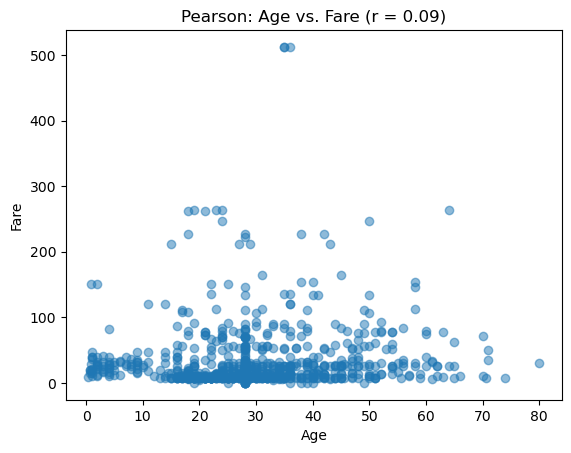

In [ ]:
r, p = stats.pearsonr(titanic['age'], titanic['fare']) # "r" es el coeficiente de correlación de Pearson
print(f"Pearson r: {r:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("Rechazo H0: hay una correlación lineal")
else:
    print("No hay evidencia para rechazar H0")

# Plot
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5)
plt.title(f"Pearson: Age vs. Fare (r = {r:.2f})")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### Ejemplo 2: Spearman
- Relación monótona (no se necesita normalidad).
- Pregunta: ¿Hay una relación monótona entre `age` y `fare`?

* H0: No hay una correlación monótona entre las variables age y fare
* H1: Hay una correlación monótona entre las variables age y fare.

In [ ]:

rho, p = stats.spearmanr(titanic['age'], titanic['fare']) # "rho" es el coeficiente de correlación de Spearman
print(f"Spearman rho: {rho:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("Rechazo H0: Hay una correlación monótona significativa.")
else:
    print("No hay evidencia suficiente para rechazar H0")

Spearman rho: 0.12, p-value: 0.0003
Rechazo H0: Hay una correlación monótona significativa.


### Ejemplo 3: Kendall
- Pregunta: ¿Hay una relación monótona entre `age` y `fare`?

* H0: No hay una correlación monótona entre las variables age y fare.
* H1: Hay una correlación monótona entre las variables age y fare. 

In [ ]:
tau, p = stats.kendalltau(titanic['age'], titanic['fare']) # "tau" es el coeficiente de correlación de Kendall
print(f"Kendall tau: {tau:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("Reject H0: Hay una relación monótona significativa.")
else:
    print("No hay evidencia suficiente para rechazar H0")

Kendall tau: 0.08, p-value: 0.0003
Reject H0: Hay una relación monótona significativa.
